In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pyfolio as pf
import pandas as pd
import numpy as np
from yahoo_finance import Share
import matplotlib
import datetime
from datetime import datetime
from sklearn.linear_model import LinearRegression

In [3]:
def get_dailyret(ser):
    return (ser.shift(-1) - ser)/ser

In [4]:
def get_smooth_val(ser, lookback):
    ###does not include today so that residual is relevant for return
    ls = []
    bs = []
    lr = LinearRegression()
    for i in range(len(ser)):
        a = ser[i-lookback:i].tolist()
        #print(a)
        if len(a) == 0:
            ls.append(np.nan)
            bs.append(np.nan)
        else:
            a = lr.fit(np.array(range(lookback)).reshape(lookback,1),np.array(a).reshape((lookback,1)))
            ls.append(float(a.predict(lookback)[0]))
            bs.append(float(a.coef_))
    return ls, bs

In [5]:
def get_stratret(row, threshold=11):
    if row['resid']>threshold:
        return -row['dailyrets']
    elif row['resid']<-threshold:
        return row['dailyrets']
    else:
        return 0

In [6]:
def main(strat):
    data = pd.DataFrame(Share(strat).get_historical('2010-05-02', '2015-12-12'))
    print('fetched data')
    data.Date = [datetime.strptime(data.Date.iloc[i], '%Y-%m-%d') for i in data.index]
    data.index = data.Date
    data = data.iloc[::-1]
    data.Close = [float(x) for x in data.Close]
    data['smooth'], data['trend'] = get_smooth_val(data.Close, 50)
    data['resid'] = data.Close-data['smooth']
    plot(data['resid'])
    show()
    data['dailyrets'] = get_dailyret(data.Close)
    
    thresh = 1.5*np.std(data['resid'])
    data['stratret'] = data.apply(get_stratret,args = (thresh,), axis = 1)
    eqcurve = np.cumprod(3*data.stratret+1)
    plot(eqcurve)
    show()
    return eqcurve[-2]

fetched data


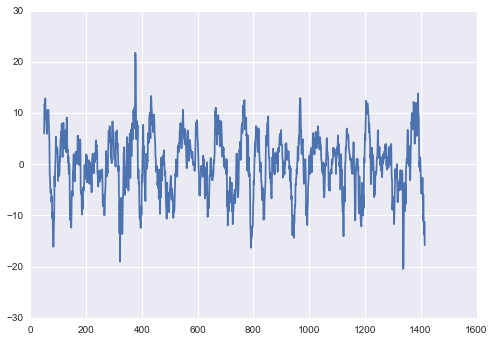

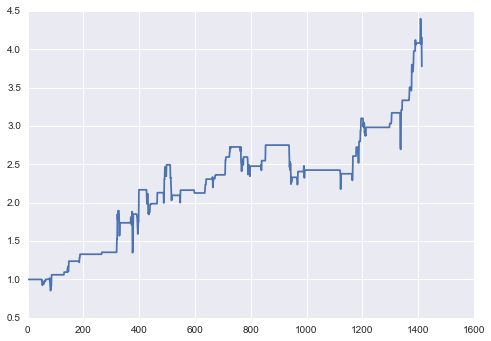

3.7763537720594123

In [7]:
main('GS')

In [8]:
import get_symbols

In [9]:
sdf = get_symbols.main()

/Users/liamconnell/anaconda/lib/python3.4/site-packages/bs4/__init__.py:166: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

To get rid of this warning, change this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


0
nan
MMM
fetched data


/Users/liamconnell/anaconda/lib/python3.4/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


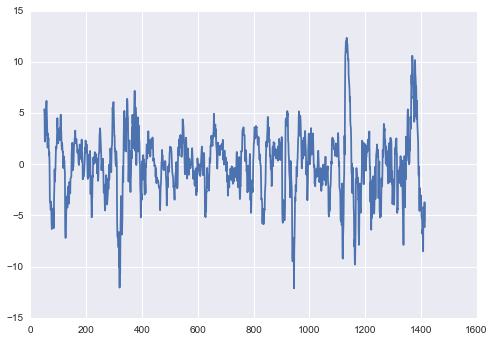

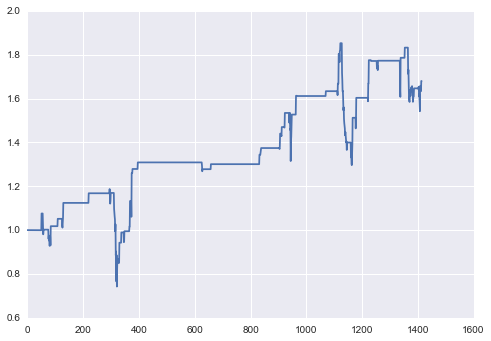

1.68017937688
1
1.68017937688
ADT
fetched data


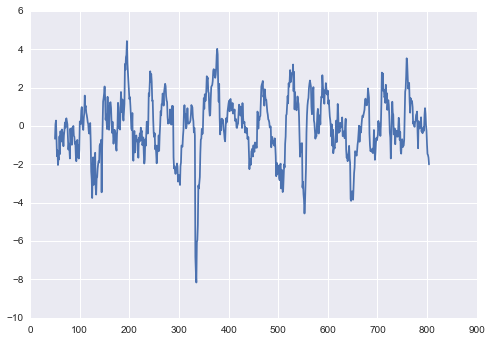

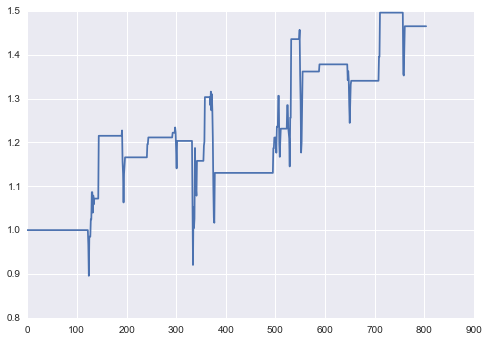

1.46499965816
2
1.57258951752
ALLE
fetched data


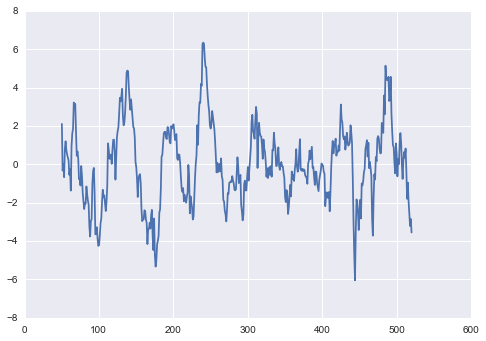

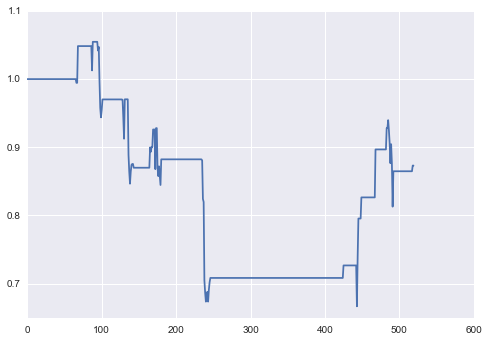

0.873231840424
3
1.33947029182
AAL
fetched data


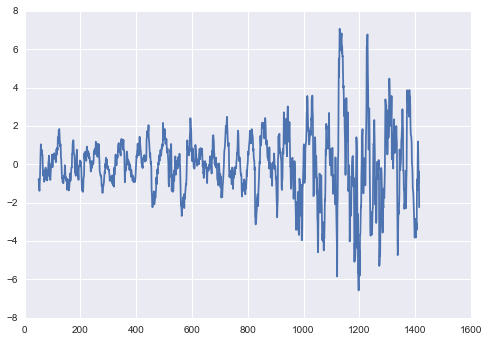

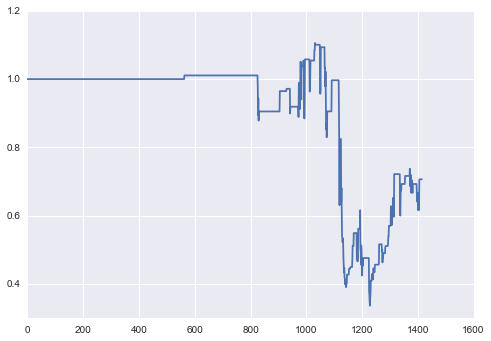

0.706042365168
4
1.18111331016
AME
fetched data


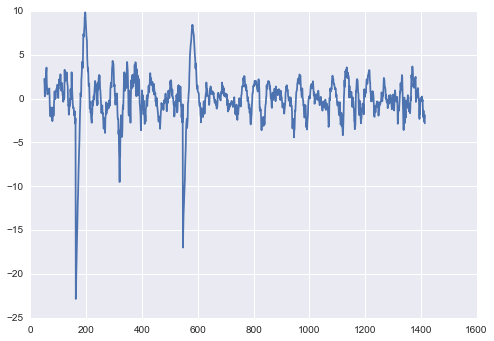

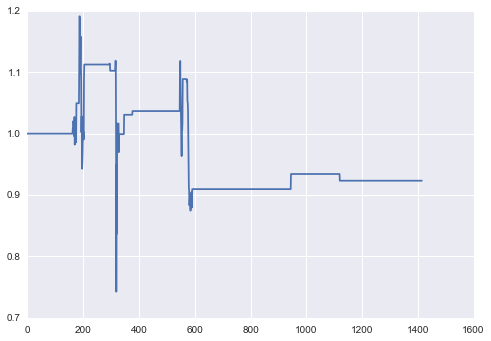

0.923372257379
5
1.1295650996
APH
fetched data


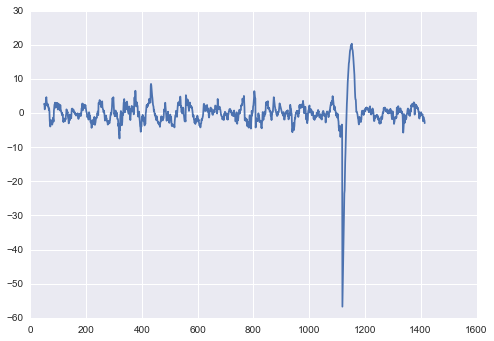

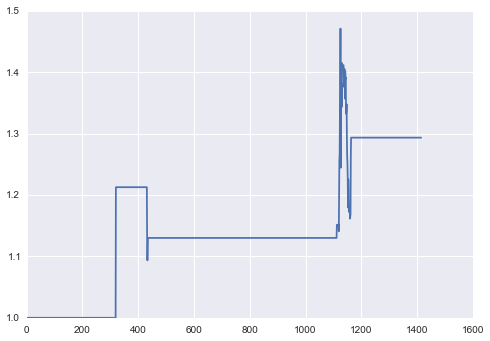

1.29352238809
6
1.15689131435
BA
fetched data


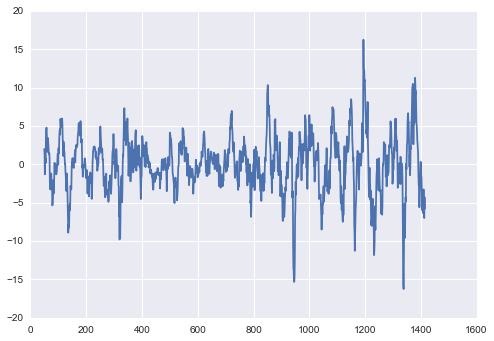

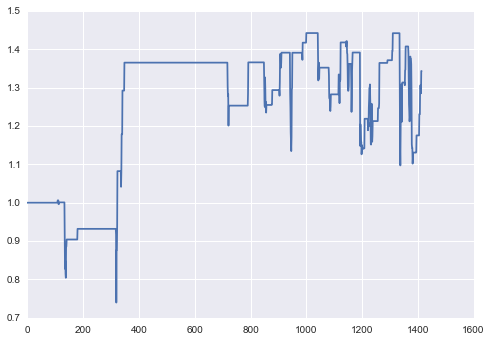

1.34326992929
7
1.18351683077
CHRW
fetched data


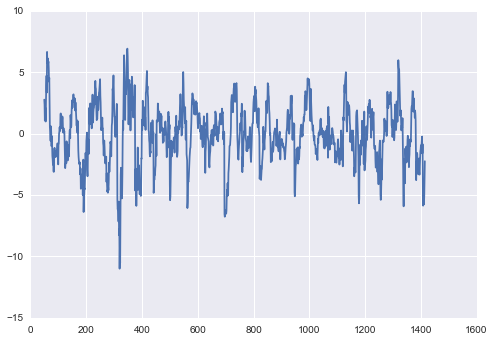

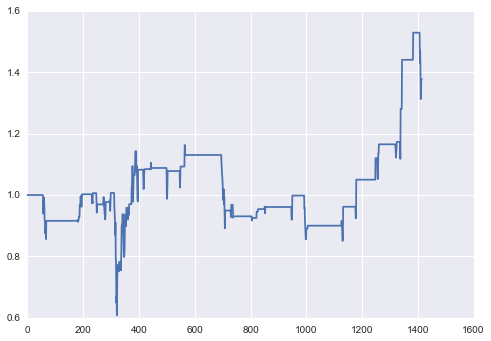

1.37773061043
8
1.20779355323
CAT
fetched data


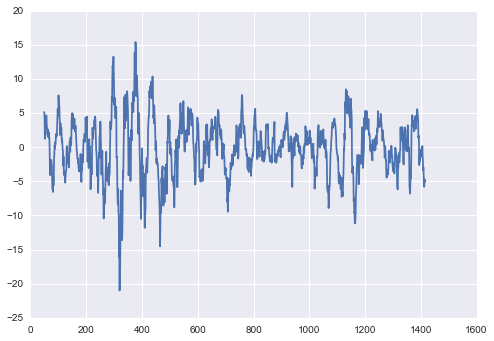

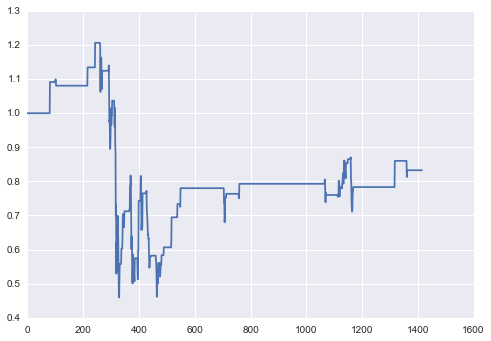

0.832747121675
9
1.1661217275
CTAS
fetched data


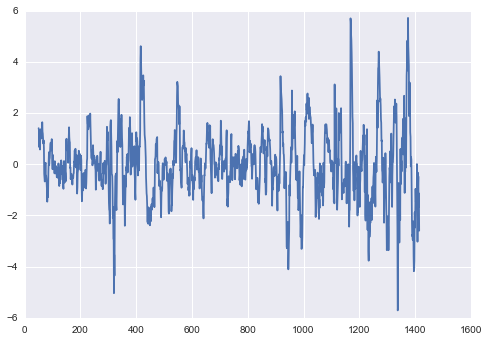

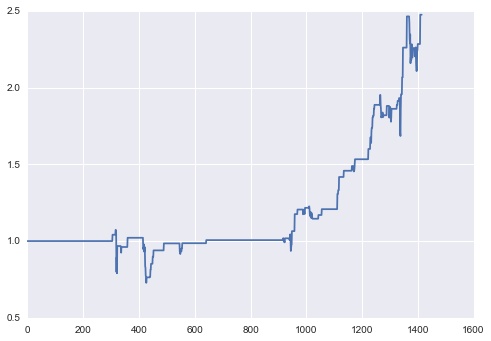

2.47502137723
10
1.29701169247
GLW
fetched data


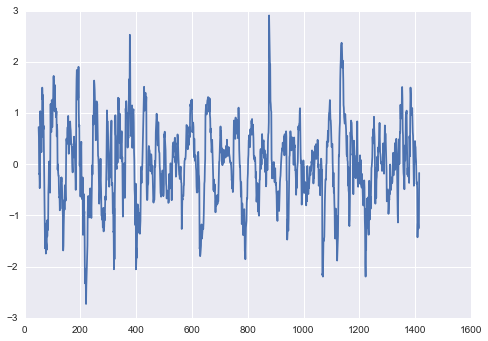

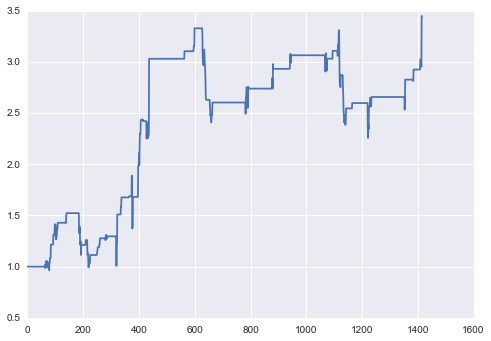

3.44992610784
11
1.49273118478
CSX
fetched data


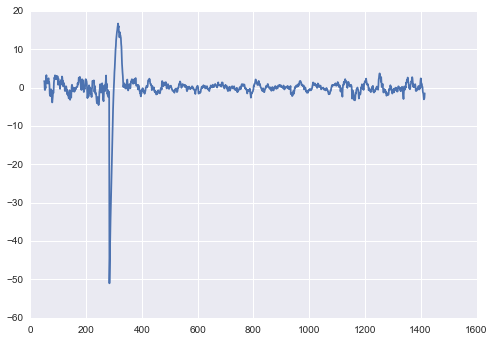

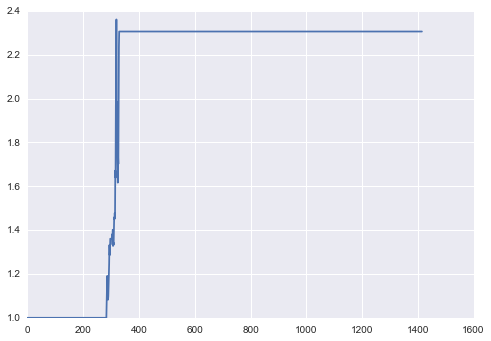

2.30595864184
12
1.56050013953
CMI
fetched data


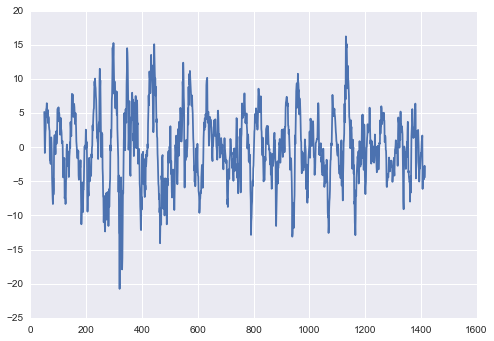

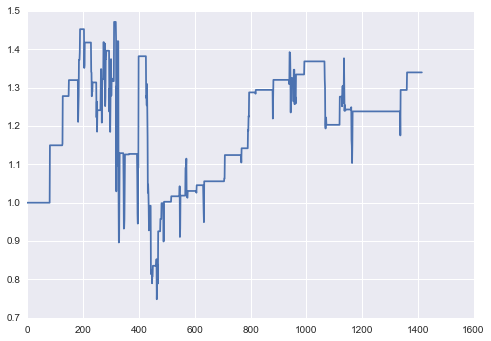

1.33967324288
13
1.54351345518
DHR
fetched data


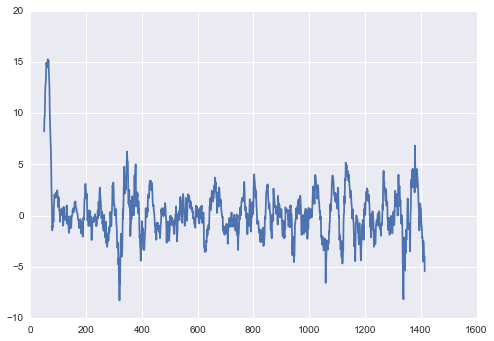

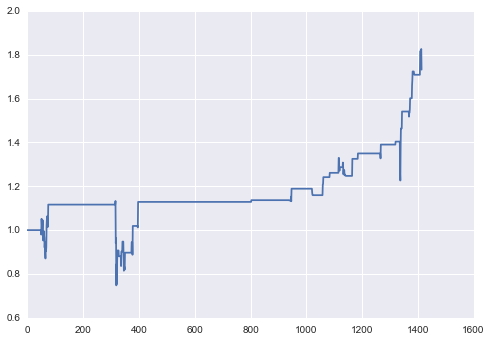

1.7320098806
14
1.55697748556
DE
fetched data


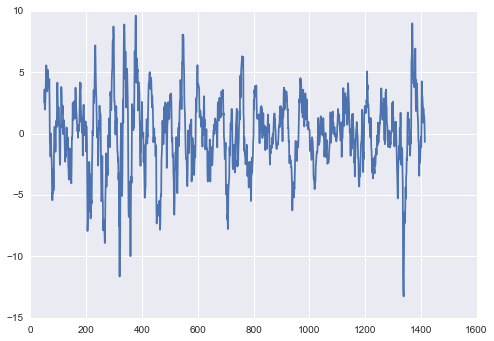

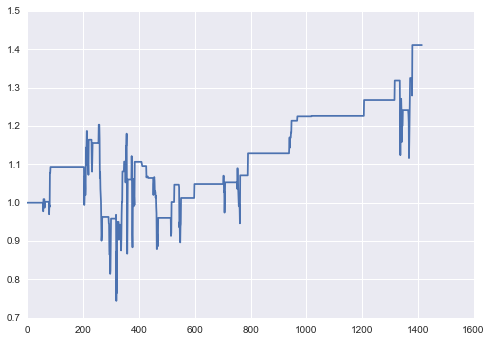

1.41094552608
15
1.5472420216
DAL
fetched data


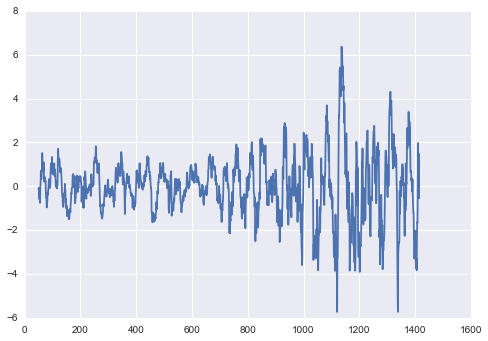

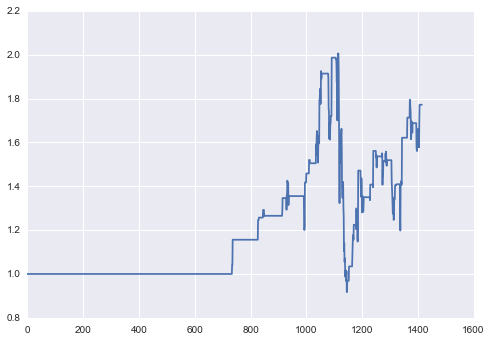

1.77196563512
16
1.56128724744
DOV
fetched data


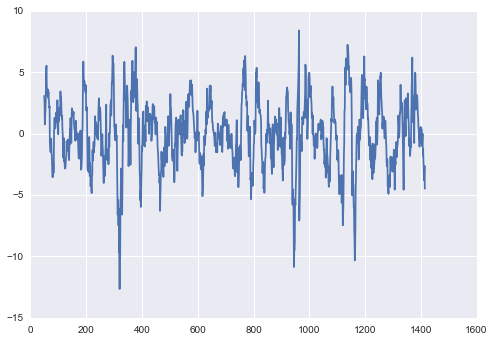

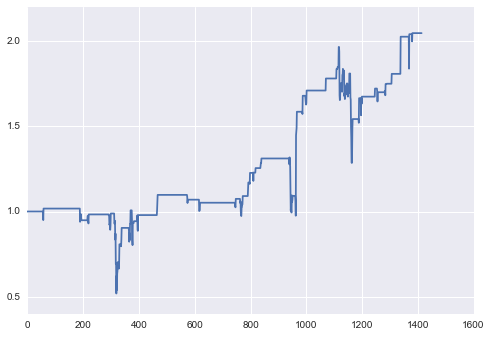

2.04617631409
17
1.58981013372
DNB
fetched data


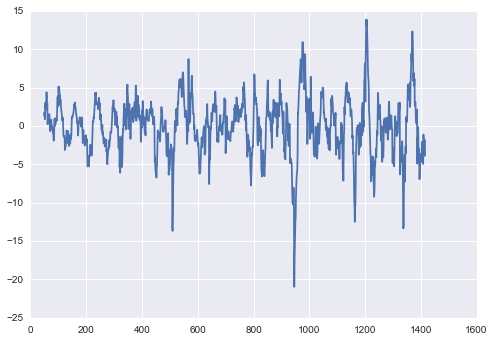

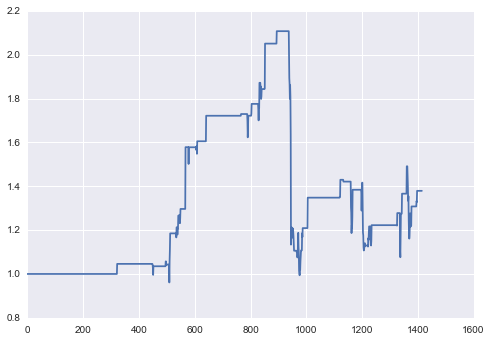

1.37916640601
18
1.5781077044
ETN
fetched data


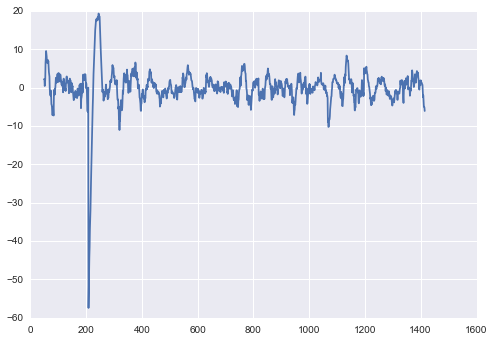

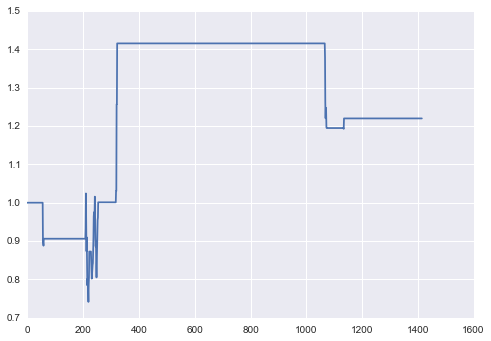

1.21971076344
19
1.55924470751
EMR
fetched data
failed
19
1.55924470751
EXPD
fetched data


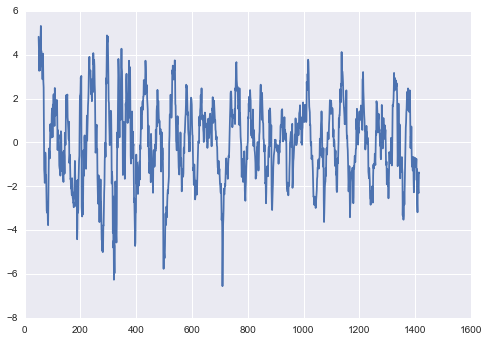

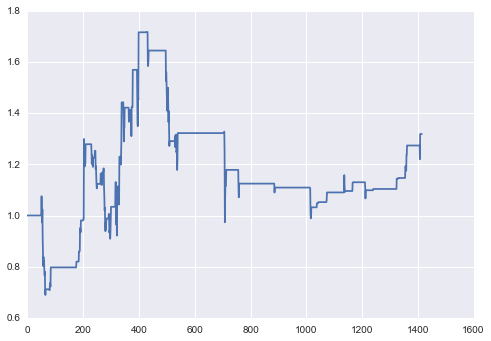

1.31855692492
20
1.54721031838
FAST
fetched data


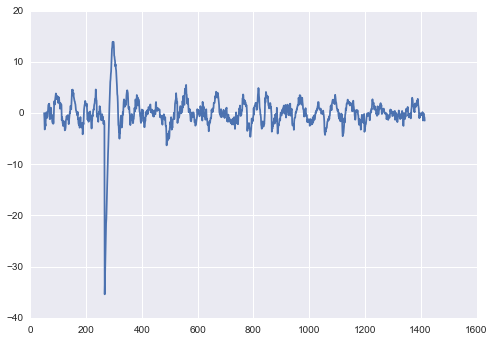

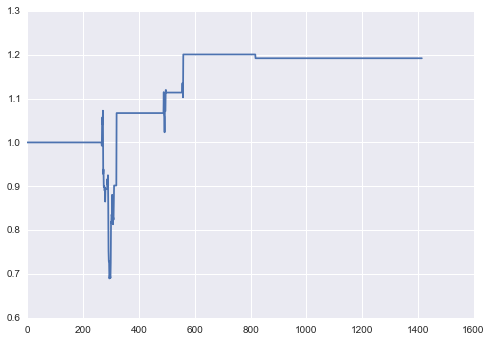

1.19201223091
21
1.53029612374
FDX
fetched data


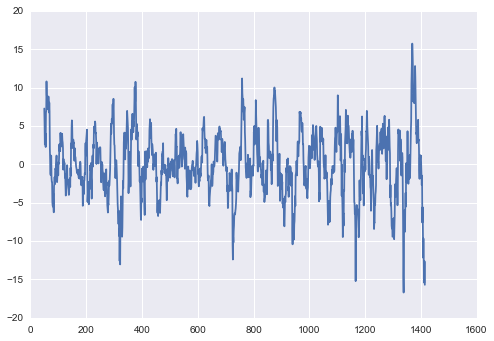

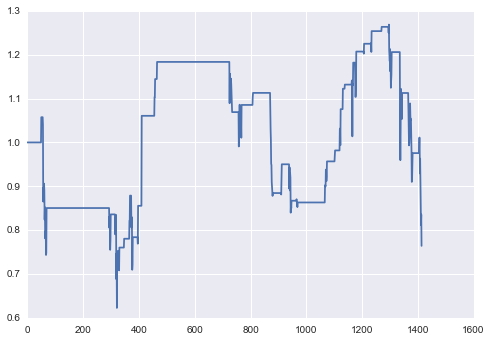

0.764110650507
22
1.49546951132
FLIR
fetched data


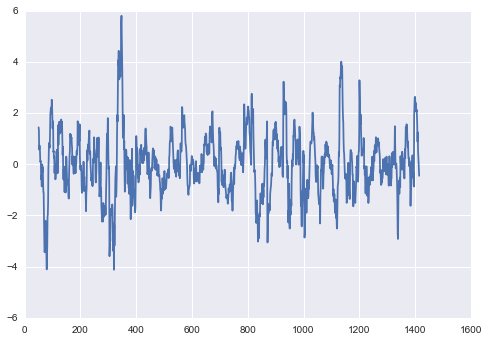

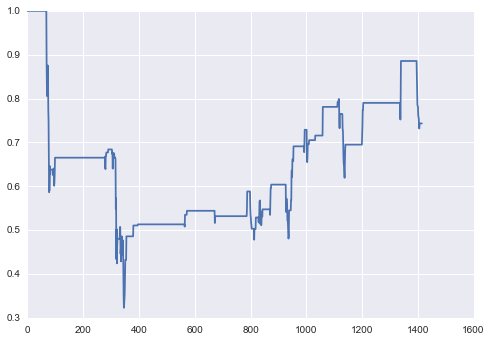

0.743348296678
23
1.46276858894
FLS
fetched data


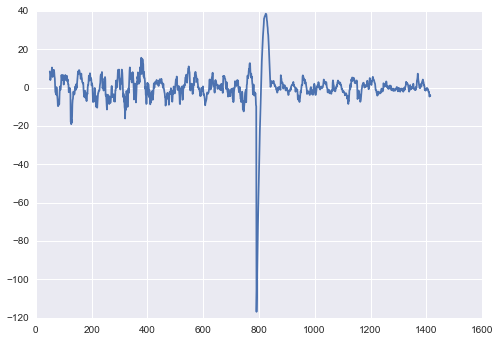

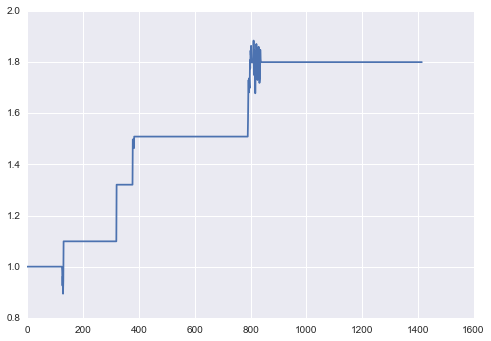

1.79969058878
24
1.4768070056
FLR
fetched data


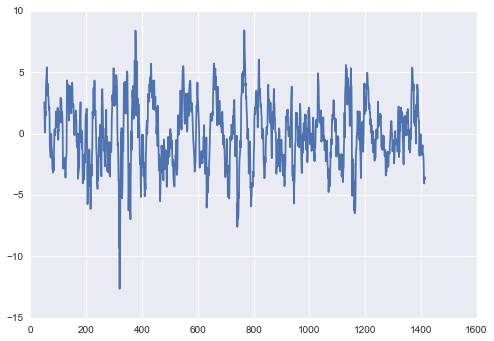

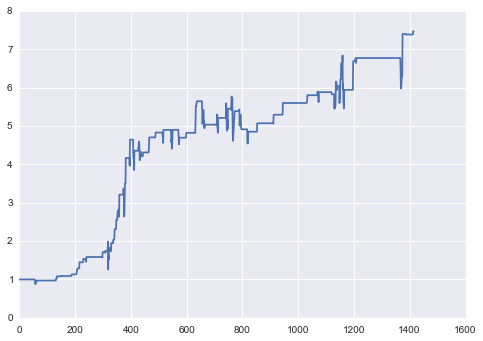

7.46721510342
25
1.71642332951
GD
fetched data


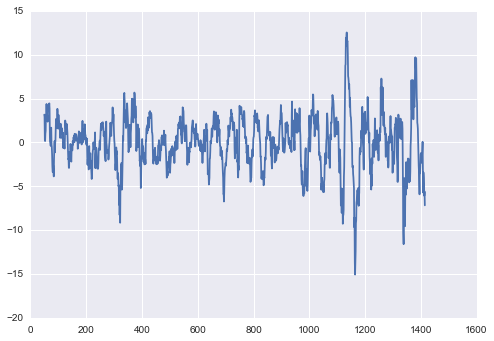

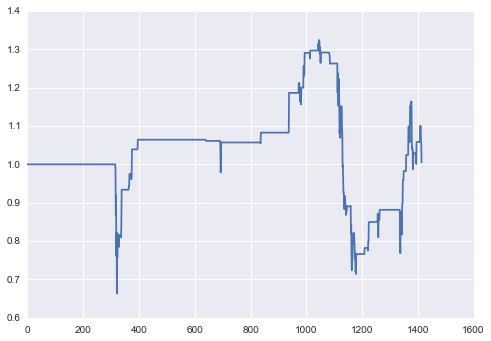

1.00521311809
26
1.68906909061
GE
fetched data


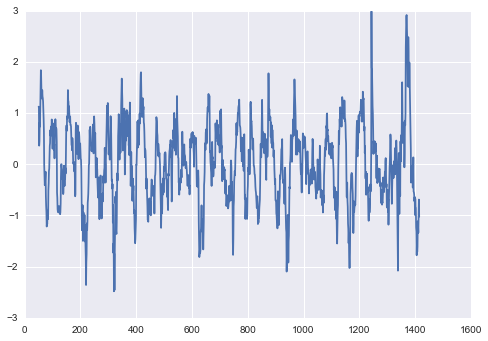

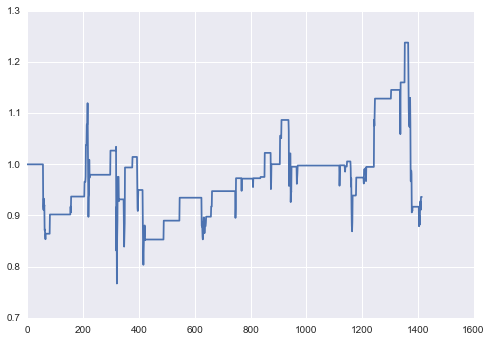

0.93631002977
27
1.6611891254
GWW
fetched data


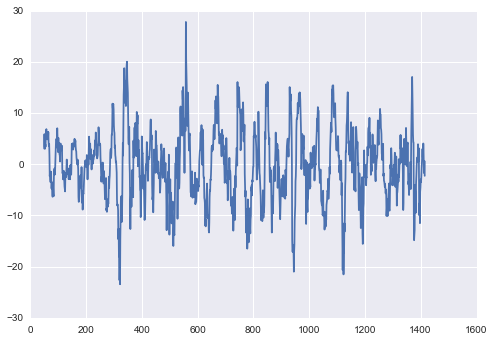

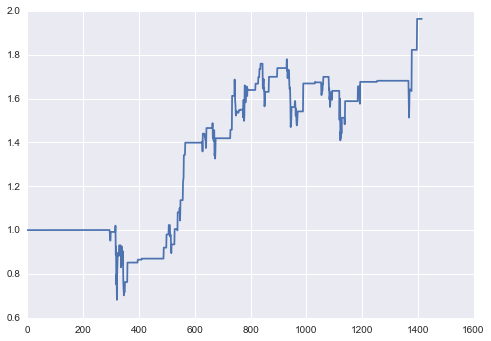

1.96358786174
28
1.67198908027
HON
fetched data


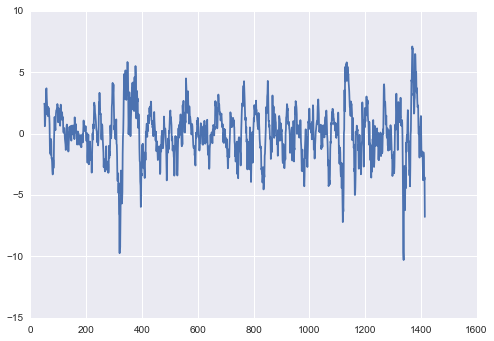

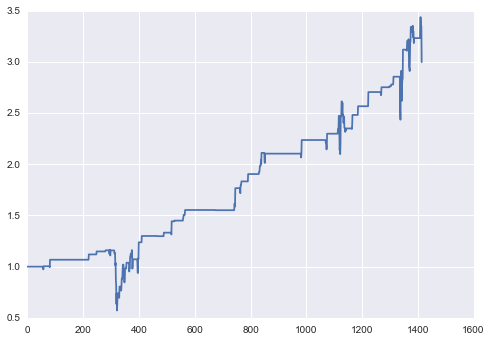

2.99919372245
29
1.71775475758
ITW
fetched data


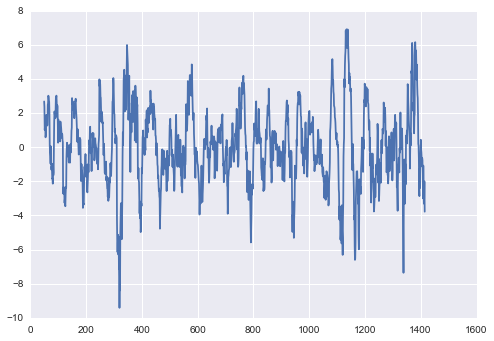

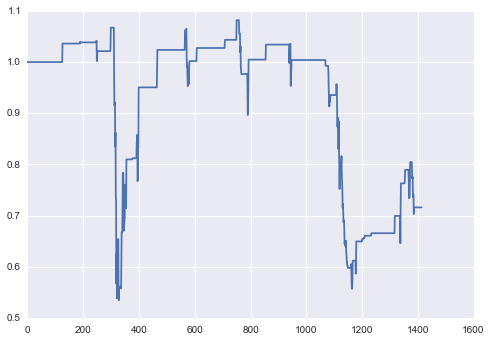

0.715855702312
30
1.68435812241
IR
fetched data


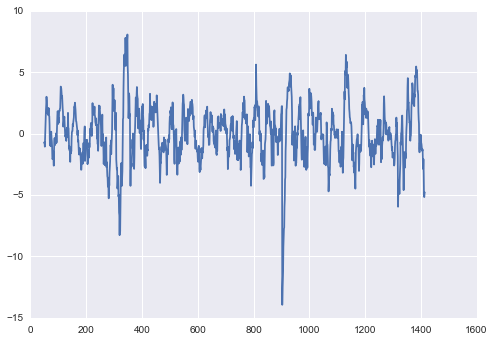

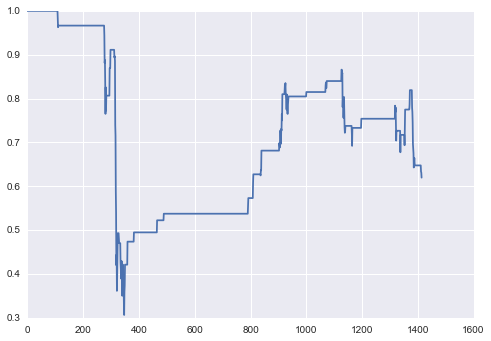

0.619739622828
31
1.65001559016
IRM
fetched data


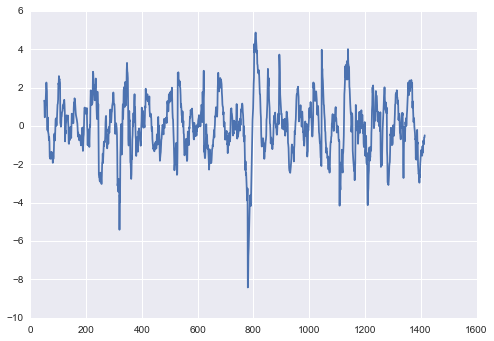

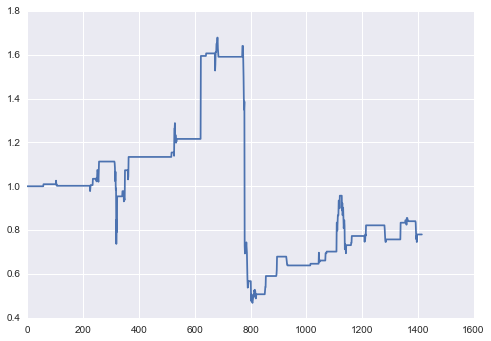

0.780168058686
32
1.6228328548
JEC
fetched data


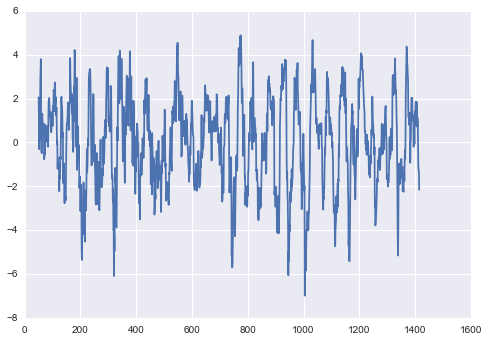

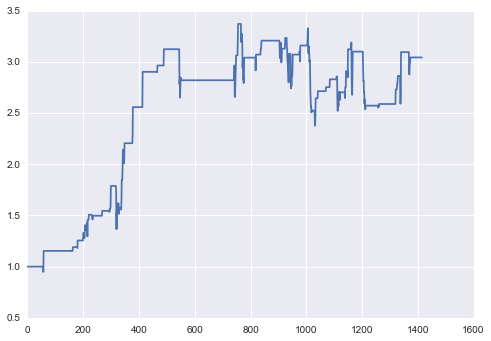

3.044973152
33
1.66592801532
JBHT
fetched data


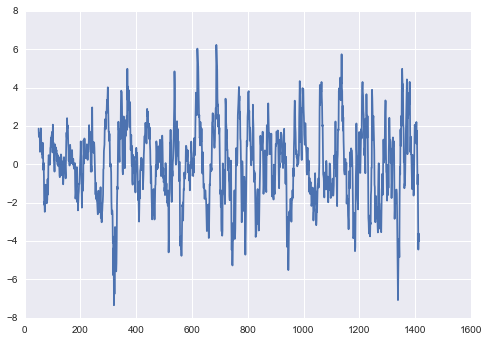

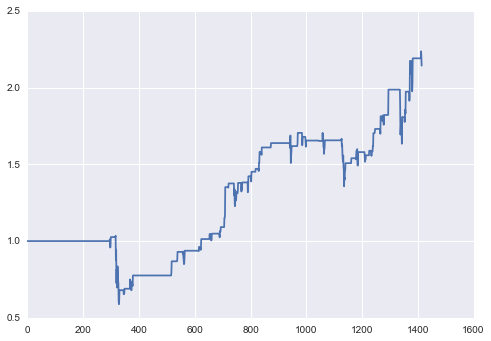

2.14306507027
34
1.67996145812
KSU
fetched data


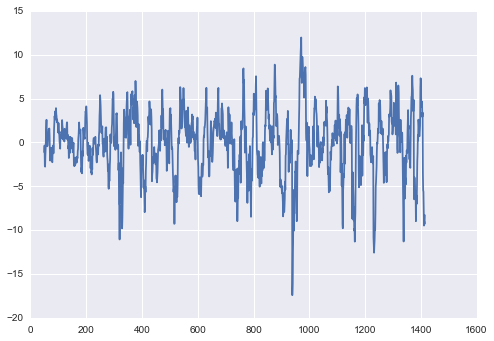

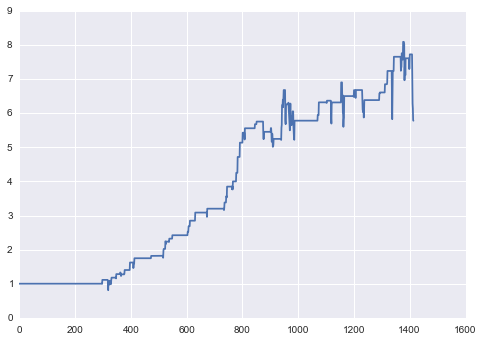

5.77970040753
35
1.79709685667
LLL
fetched data


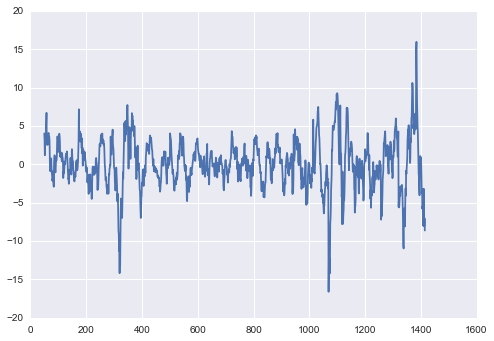

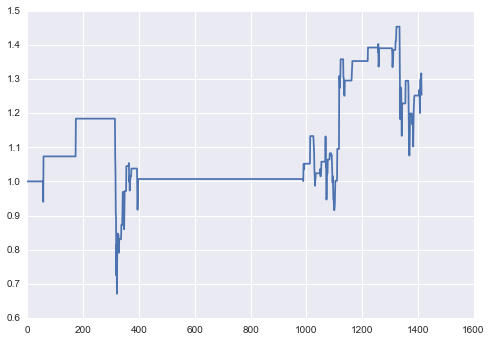

1.25382165101
36
1.78200587874
LEG
fetched data


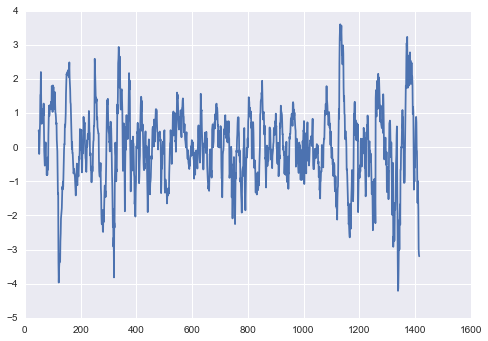

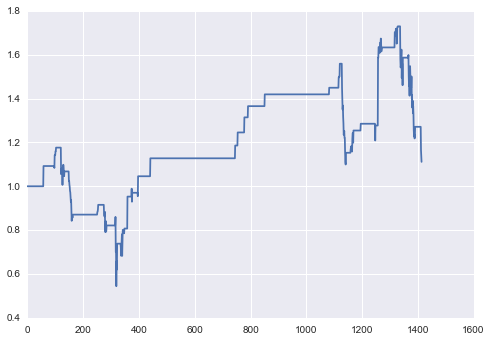

1.11139176581
37
1.76388117298
LMT
fetched data


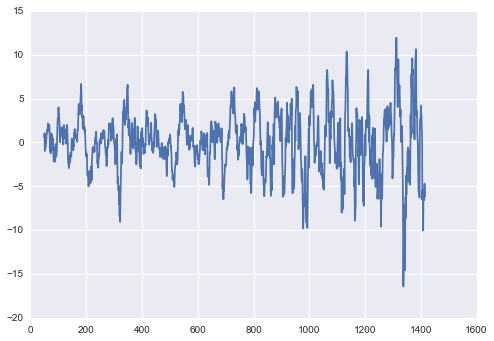

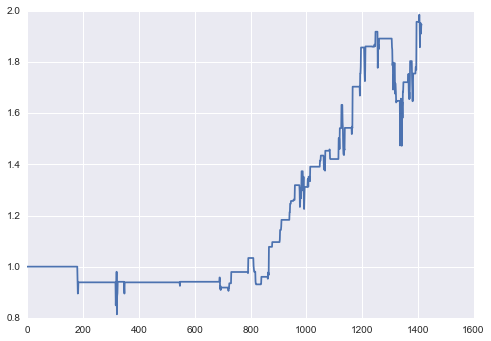

1.94633932673
38
1.76868270334
MAS
fetched data


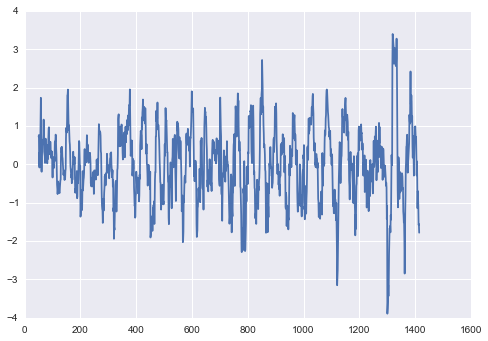

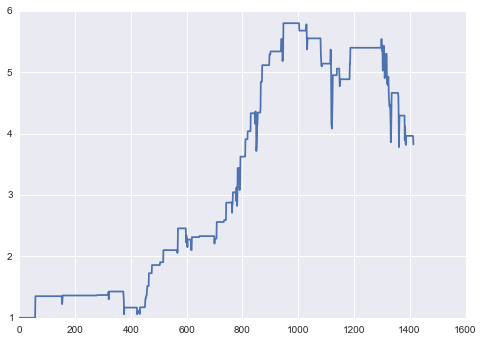

3.826226157
39
1.8214402278
NLSN
fetched data


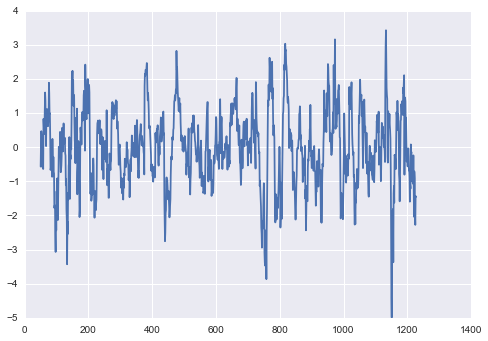

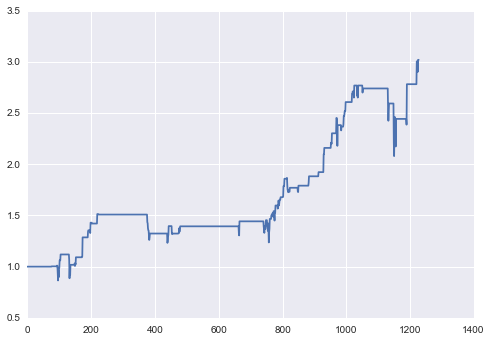

3.02168709446
40
1.85144639946
NSC
fetched data


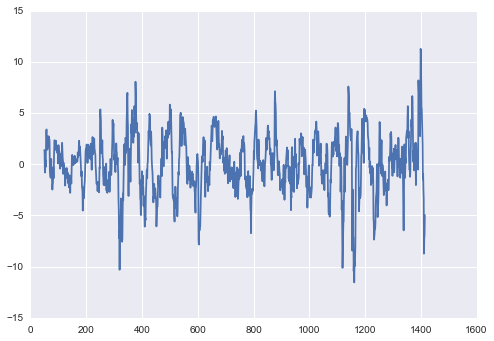

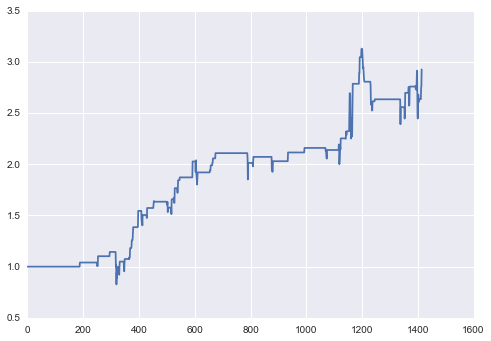

2.92780263056
41
1.87769899047
NOC
fetched data


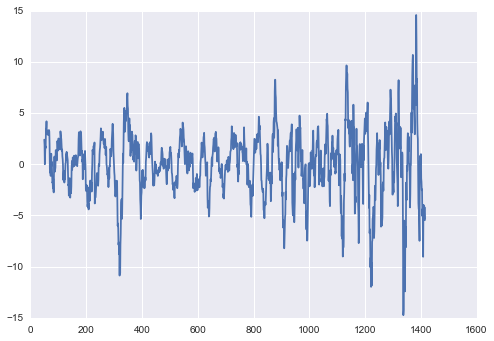

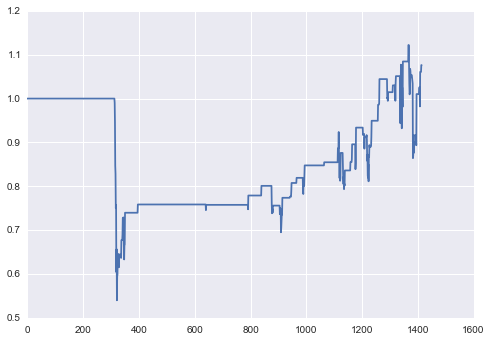

1.07639124166
42
1.85862023454
PCAR
fetched data


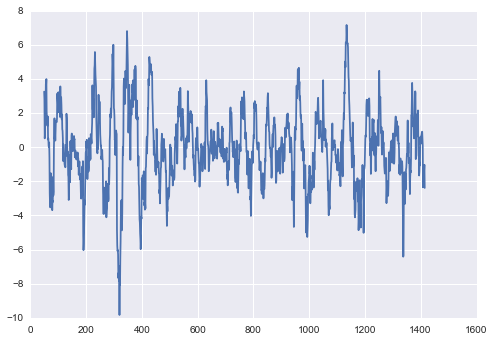

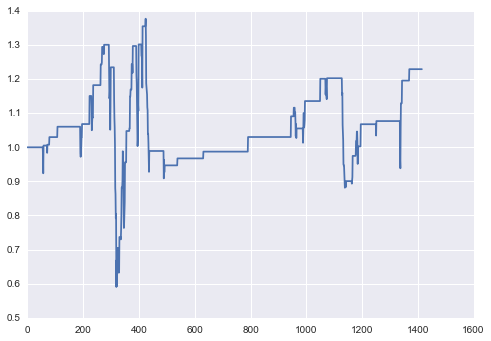

1.22911311262
43
1.84398053403
PH
fetched data


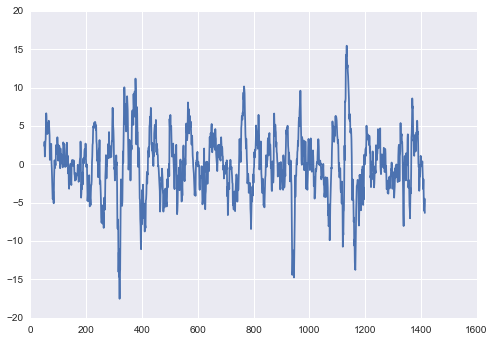

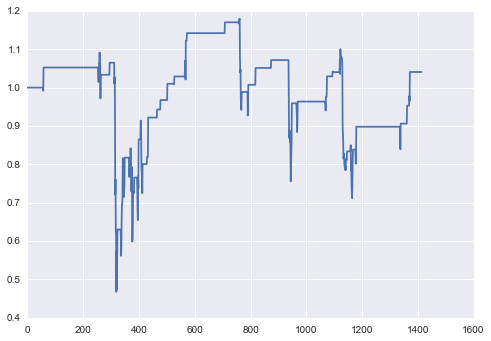

1.04075718288
44
1.82572545787
PNR
fetched data


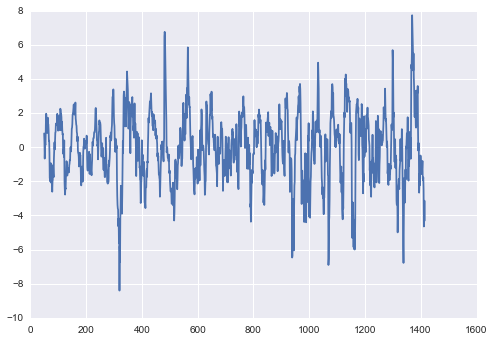

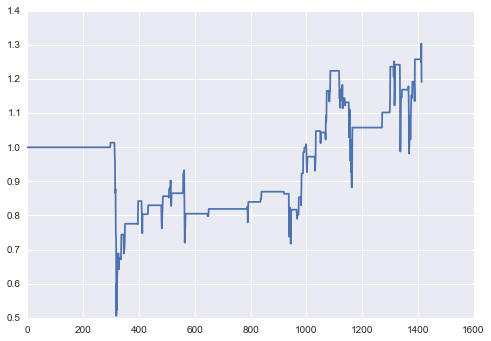

1.1912869787
45
1.811626825
PBI
fetched data


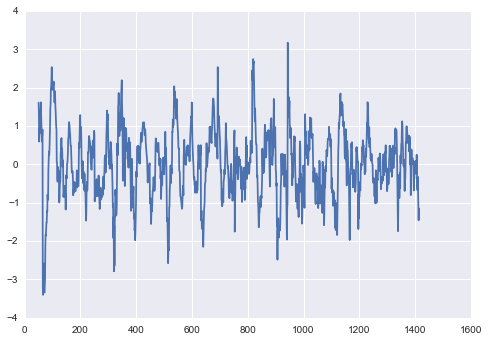

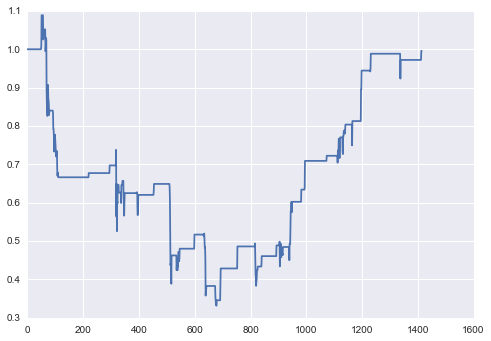

0.995779639568
46
1.79389101662
PCP
fetched data


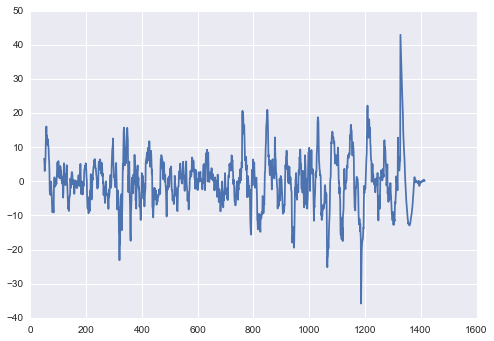

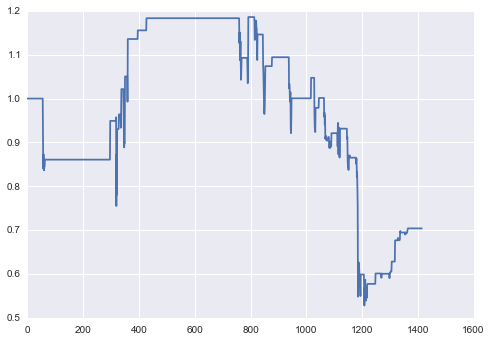

0.703939652082
47
1.77070056206
PWR
fetched data


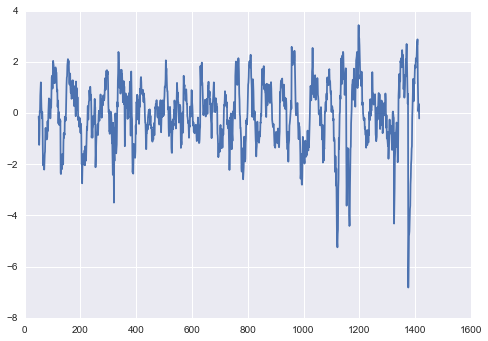

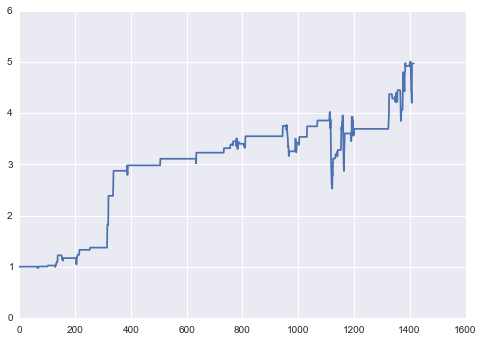

4.97307582548
48
1.83741671338
RTN
fetched data


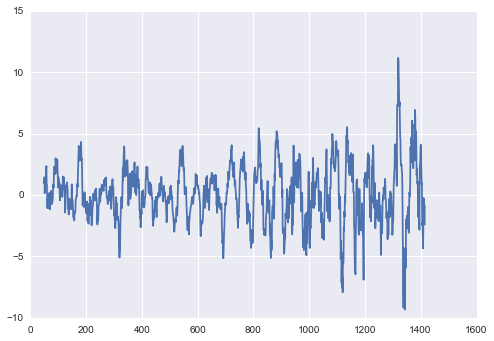

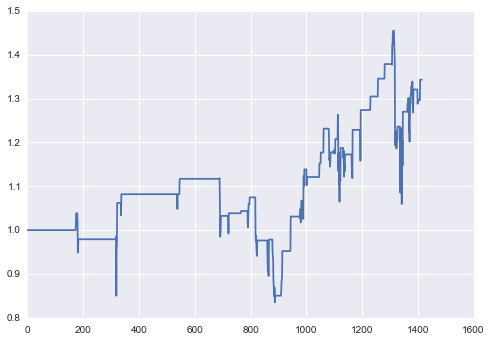

1.34310399384
49
1.82732869869
RSG
fetched data


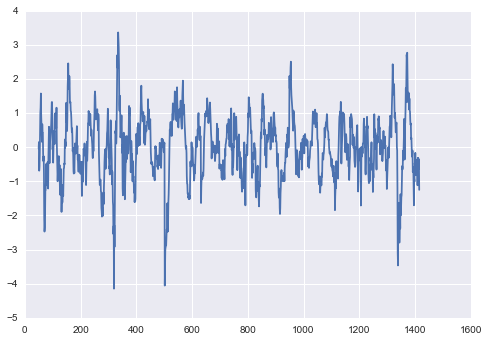

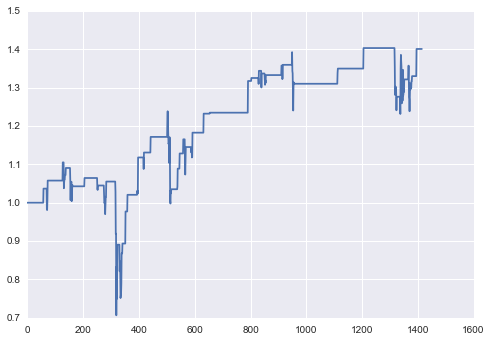

1.40077227192
50
1.81879757016
RHI
fetched data


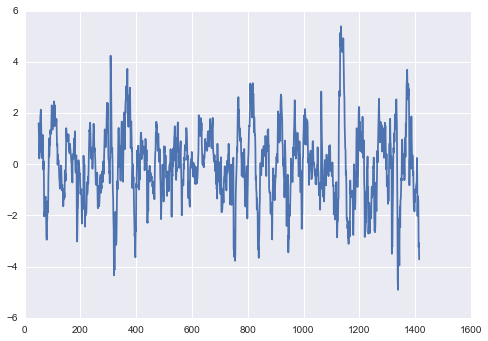

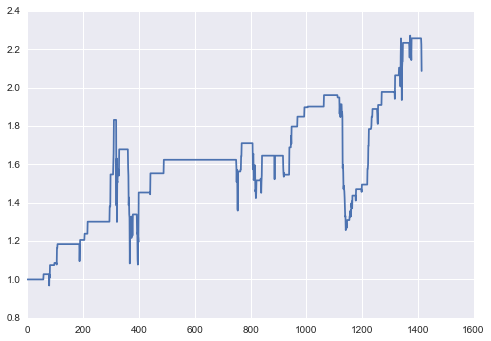

2.08689111765
51
1.82405430638
ROK
fetched data


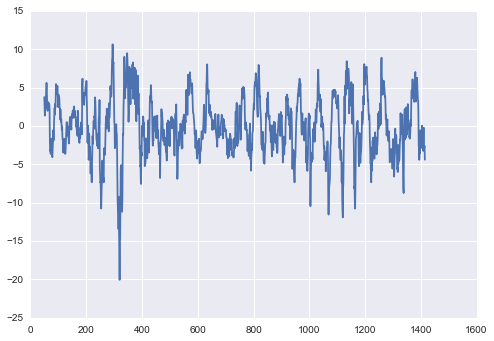

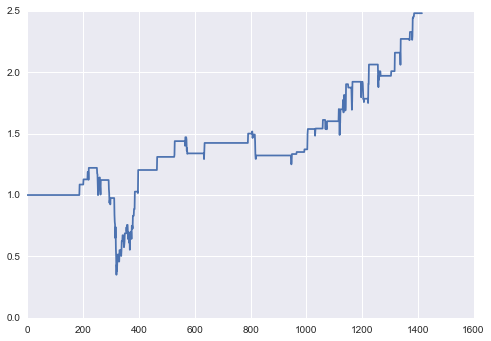

2.48115697452
52
1.83669089615
COL
fetched data


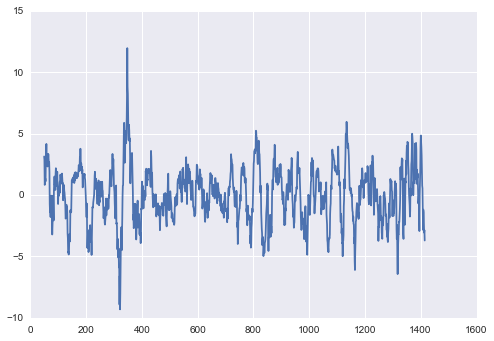

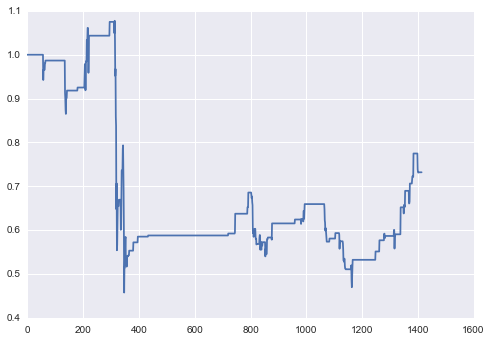

0.731894984216
53
1.81584569027
ROP
fetched data


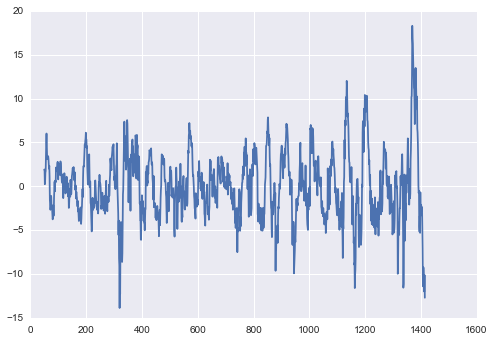

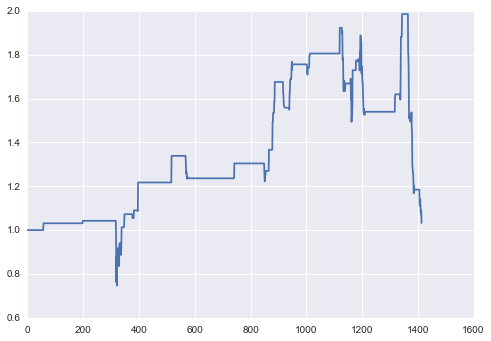

1.0325063559
54
1.8013394063
R
fetched data


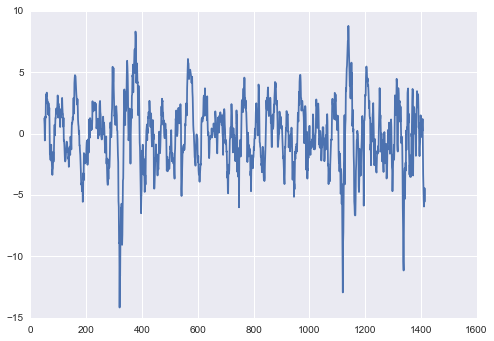

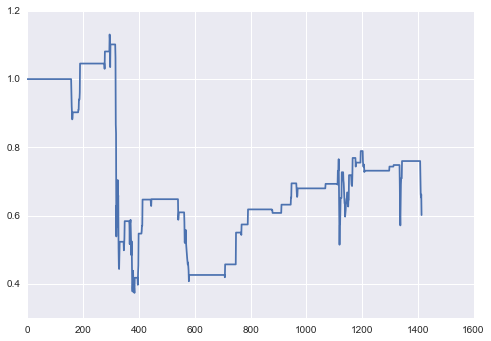

0.60132666121
55
1.77952099275
LUV
failed
55
1.77952099275
SRCL
failed
55
1.77952099275
TXT
failed
55
1.77952099275
TYC
failed
55
1.77952099275
UNP
failed
55
1.77952099275
UAL
failed
55
1.77952099275
UPS
failed
55
1.77952099275
URI
failed
55
1.77952099275
UTX
failed
55
1.77952099275
VRSK
failed
55
1.77952099275
WM
failed
55
1.77952099275
XYL
failed
55
1.77952099275
ABT
failed
55
1.77952099275
ABBV
failed
55
1.77952099275
AET
failed
55
1.77952099275
A
failed
55
1.77952099275
AGN
failed
55
1.77952099275
ALXN
fetched data


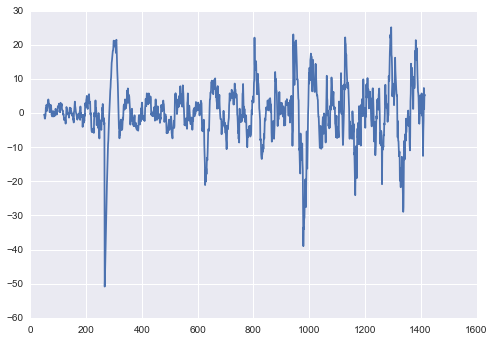

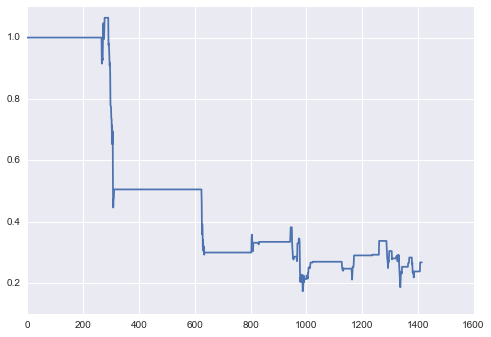

0.267484845152
56
1.75252034726
ABC
fetched data


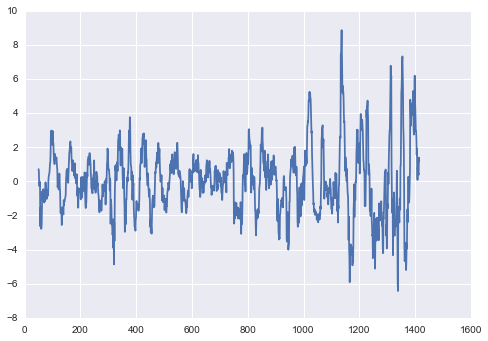

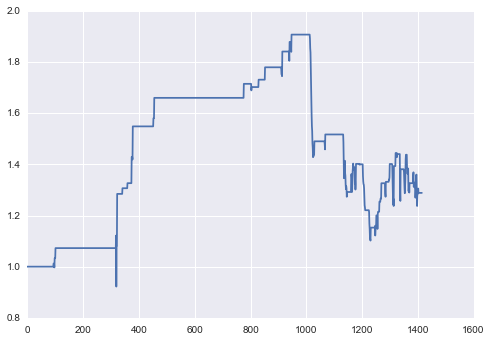

1.28840606005
57
1.74437799134
AMGN
fetched data


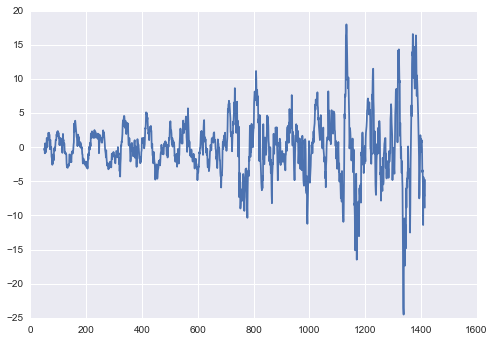

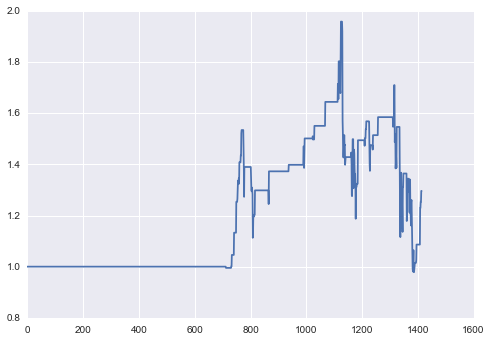

1.29612812552
58
1.73664954538
BCR
fetched data


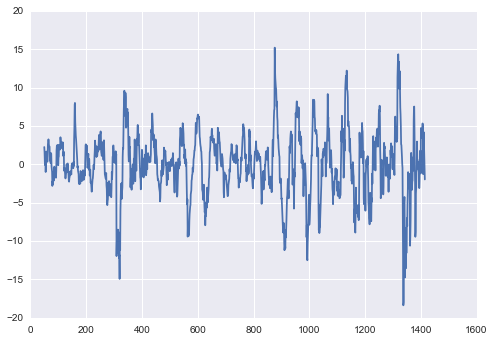

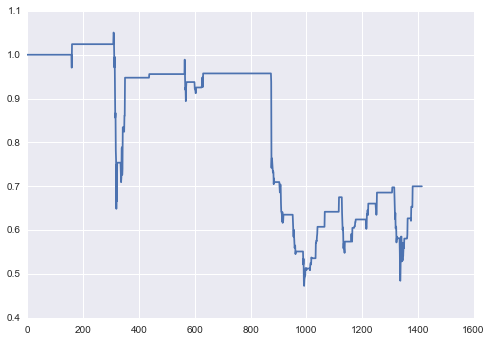

0.6998893014
59
1.71907733786
BXLT
fetched data


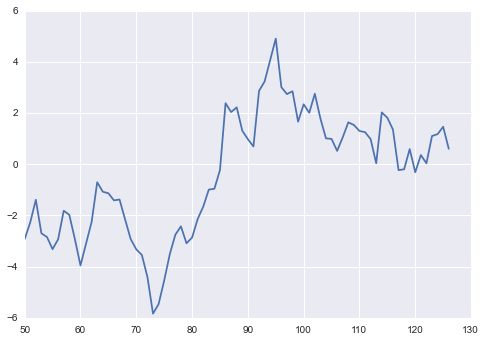

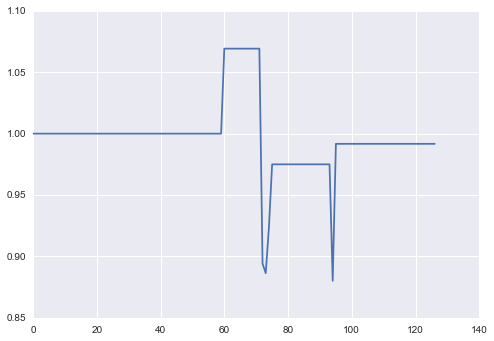

0.991713850303
60
1.70695461306
BAX
fetched data


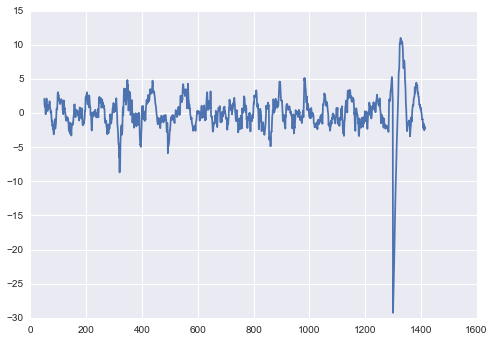

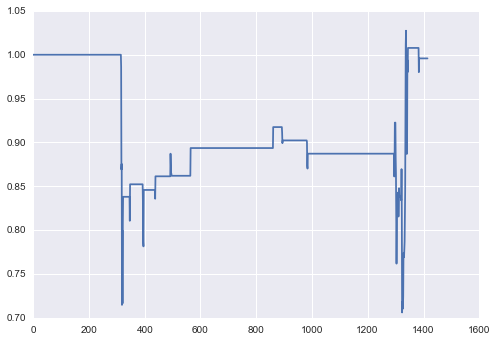

0.995825303368
61
1.69529675553
BDX
fetched data


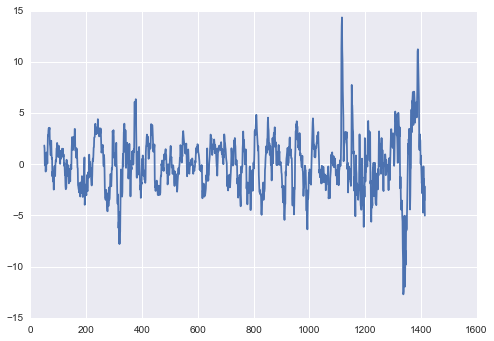

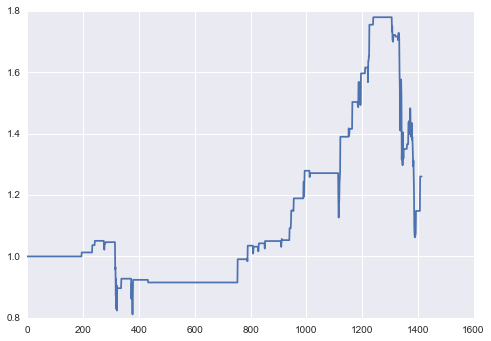

1.2603589563
62
1.68828162973
BIIB
fetched data


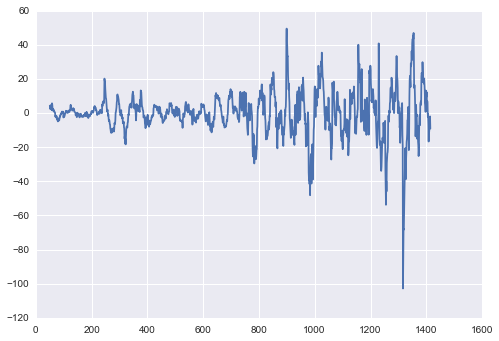

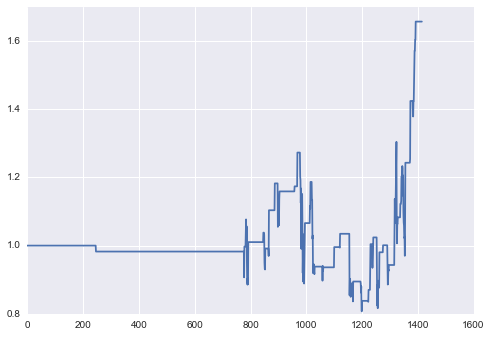

1.65691580413
63
1.68778375949
BSX
fetched data


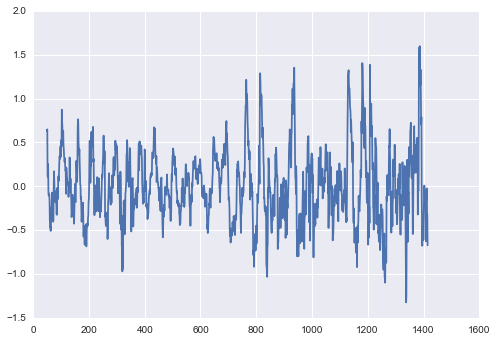

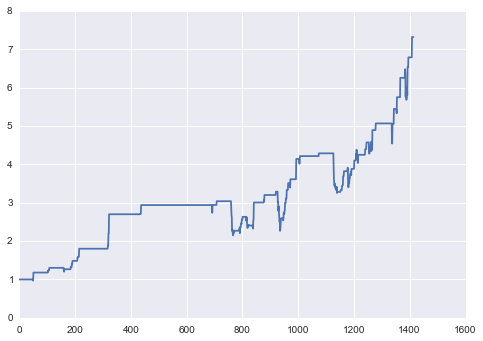

7.31934277567
64
1.77577686911
BMY
fetched data


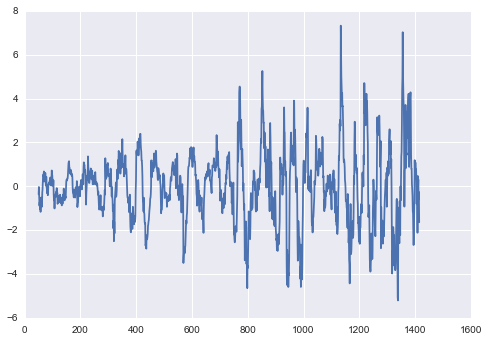

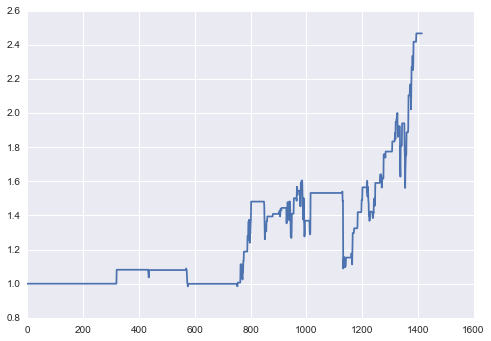

2.46798069659
65
1.78642615877
CAH
fetched data


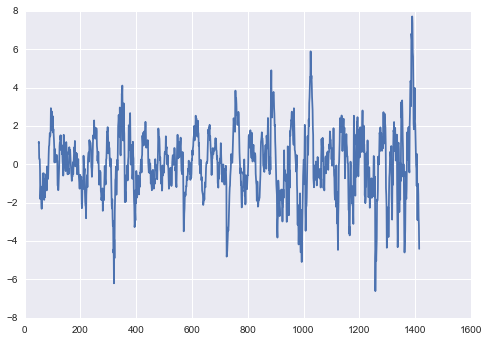

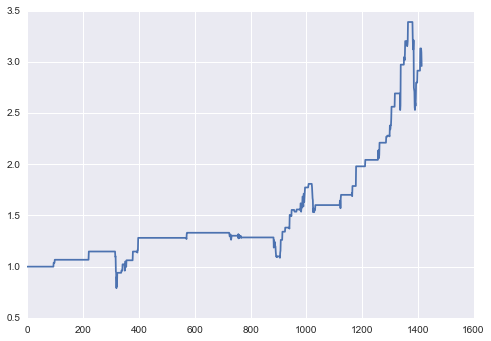

2.96116836156
66
1.80422528305
HSIC
fetched data


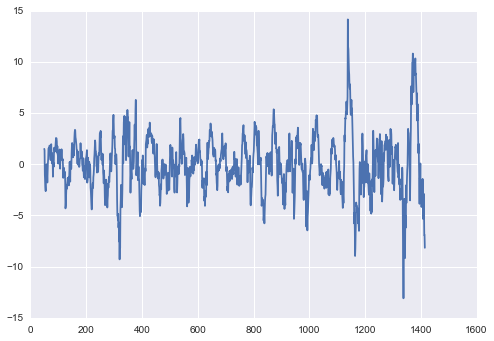

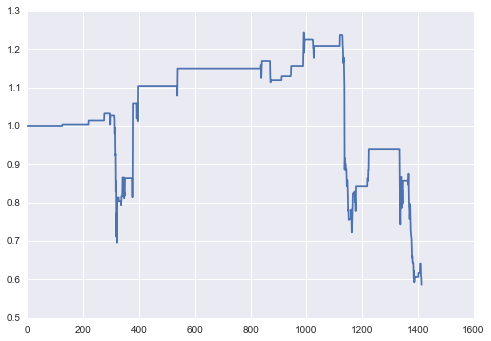

0.586202883083
67
1.78604584425
CELG
fetched data


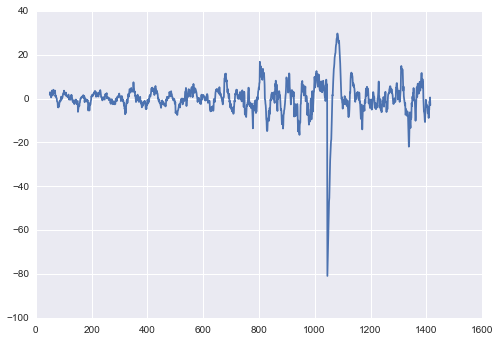

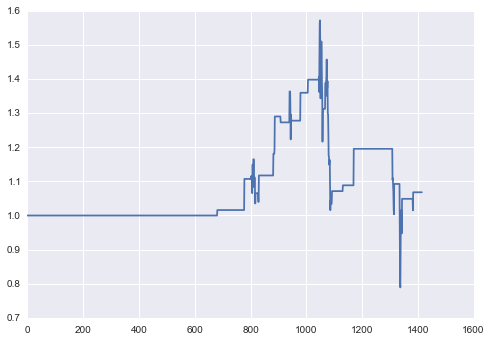

1.06807980808
68
1.77548752018
CERN
fetched data


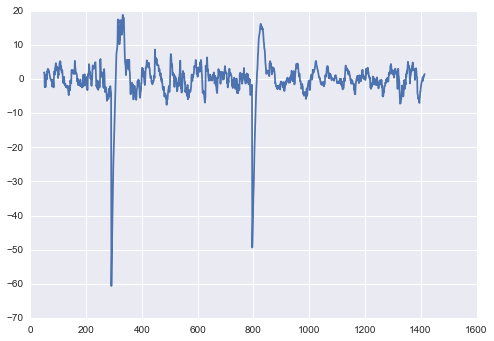

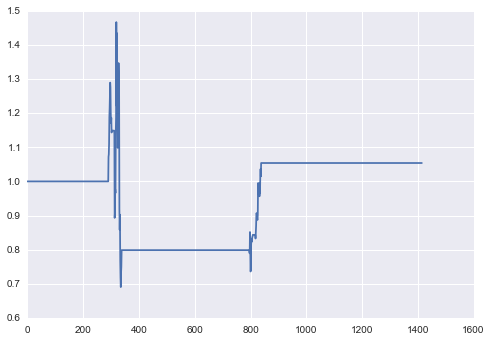

1.0539292489
69
1.76503015393
CI
fetched data


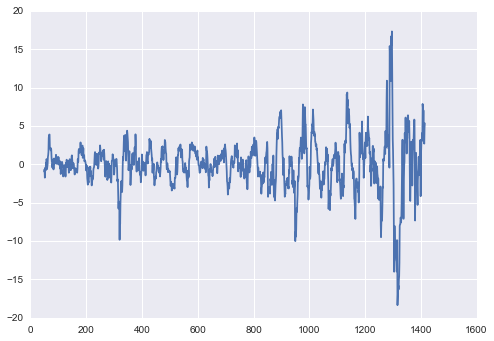

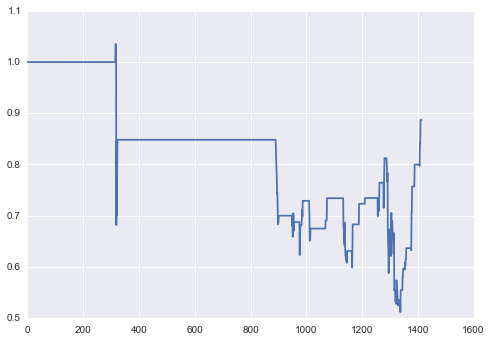

0.886806120345
70
1.75248409631
DVA
fetched data


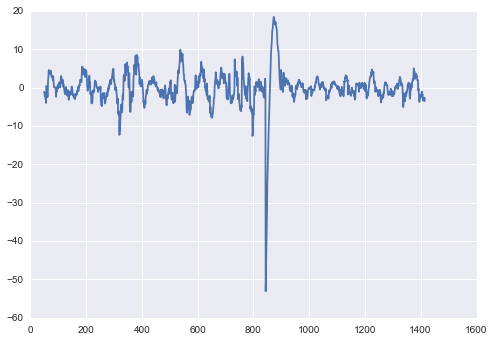

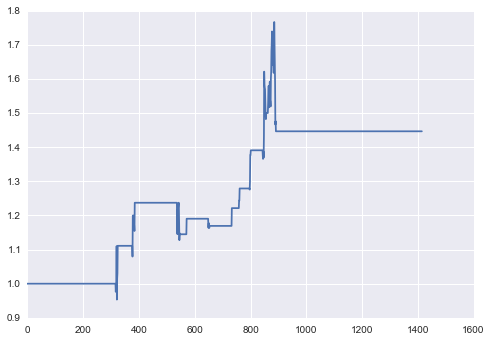

In [ ]:
rets = []
numstrats = 0
for ticker in sdf:
    #print(rets[-1])
    print(numstrats)
    print(np.mean(rets))
    print(ticker)
    try:
        rets.append(main(ticker))
        numstrats+=1
        print(rets[-1])
    except:
        print('failed')

In [125]:
lr.fit(np.array(range(5)).reshape(5,1),z.reshape((5,1)))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [147]:
float(lr.coef_)

-2.0149980000000003

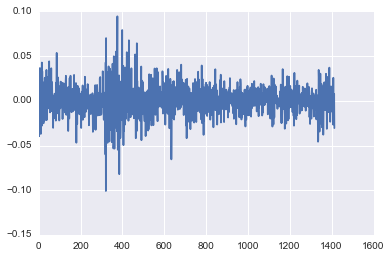

In [66]:
plot(get_dailyret(gs.Close))

In [58]:
float(gs.Close[0])

149.5

In [95]:
gs.Close.head(6)

Date
2010-05-03    149.500000
2010-05-04    149.449997
2010-05-05    148.190002
2010-05-06    142.320007
2010-05-07    142.990005
2010-05-10    143.830002
Name: Close, dtype: float64

In [1]:
from urllib.request import Request
from urllib.request import urlopen
import pytz
import pandas as pd

from bs4 import BeautifulSoup
from datetime import datetime
from pandas.io.data import DataReader

In [2]:
SITE = "http://en.wikipedia.org/wiki/List_of_S%26P_500_companies"

In [3]:
def scrape_list(site):
    hdr = {'User-Agent': 'Mozilla/5.0'}
    req = Request(site, headers=hdr)
    page = urlopen(req)
    soup = BeautifulSoup(page)

    table = soup.find('table', {'class': 'wikitable sortable'})
    sector_tickers = dict()
    for row in table.findAll('tr'):
        col = row.findAll('td')
        if len(col) > 0:
            sector = str(col[3].string.strip()).lower().replace(' ', '_')
            ticker = str(col[0].string.strip())
            if sector not in sector_tickers:
                sector_tickers[sector] = list()
            sector_tickers[sector].append(ticker)
    return sector_tickers


In [4]:
ls = scrape_list(SITE)

/Users/liamconnell/anaconda/lib/python3.4/site-packages/bs4/__init__.py:166: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

To get rid of this warning, change this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


In [5]:
sdf = []
for key in ls:
    for k in ls[key]:
        sdf.append(k)
    #print(ls[key])
sdf

['MMM',
 'ADT',
 'ALLE',
 'AAL',
 'AME',
 'APH',
 'BA',
 'CHRW',
 'CAT',
 'CTAS',
 'GLW',
 'CSX',
 'CMI',
 'DHR',
 'DE',
 'DAL',
 'DOV',
 'DNB',
 'ETN',
 'EMR',
 'EXPD',
 'FAST',
 'FDX',
 'FLIR',
 'FLS',
 'FLR',
 'GD',
 'GE',
 'GWW',
 'HON',
 'ITW',
 'IR',
 'IRM',
 'JEC',
 'JBHT',
 'KSU',
 'LLL',
 'LEG',
 'LMT',
 'MAS',
 'NLSN',
 'NSC',
 'NOC',
 'PCAR',
 'PH',
 'PNR',
 'PBI',
 'PCP',
 'PWR',
 'RTN',
 'RSG',
 'RHI',
 'ROK',
 'COL',
 'ROP',
 'R',
 'LUV',
 'SRCL',
 'TXT',
 'TYC',
 'UNP',
 'UAL',
 'UPS',
 'URI',
 'UTX',
 'VRSK',
 'WM',
 'XYL',
 'ACN',
 'ATVI',
 'ADBE',
 'AKAM',
 'ADS',
 'GOOGL',
 'GOOG',
 'ALTR',
 'ADI',
 'AAPL',
 'AMAT',
 'ADSK',
 'ADP',
 'AVGO',
 'BRCM',
 'CA',
 'CSCO',
 'CTXS',
 'CTSH',
 'CSRA',
 'EBAY',
 'EA',
 'EMC',
 'EQIX',
 'FFIV',
 'FB',
 'FIS',
 'FSLR',
 'FISV',
 'HRS',
 'HPE',
 'HPQ',
 'INTC',
 'IBM',
 'INTU',
 'JNPR',
 'KLAC',
 'LRCX',
 'LLTC',
 'MA',
 'MCHP',
 'MU',
 'MSFT',
 'MSI',
 'NTAP',
 'NFLX',
 'NVDA',
 'ORCL',
 'PAYX',
 'PYPL',
 'QRVO',
 'QCOM',
 'RHT'